In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [62]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [63]:
database_path = "Resources/hawaii.sqlite"
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()
conn

In [64]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [65]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [67]:
# Getting column names
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23')

In [119]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [121]:
# Perform a query to retrieve the data and precipitation scores\
results = session.query(Measurements.date, func.sum(Measurements.prcp)).\
    filter(Measurements.date >= '2016-08-23').\
    group_by(Measurements.date).\
    order_by(Measurements.date.desc()).all()

results

#date = [results[1] for result in results]


[('2017-08-23', 0.53),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.5800000000000001),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0.19),
 ('2017-08-16', 0.61),
 ('2017-08-15', 0.8200000000000001),
 ('2017-08-14', 0.31),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.07),
 ('2017-08-09', 0.15),
 ('2017-08-08', 0.44000000000000006),
 ('2017-08-07', 0.05),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.06),
 ('2017-08-04', 0.06),
 ('2017-08-03', 0.06999999999999999),
 ('2017-08-02', 0.3),
 ('2017-08-01', 0.13999999999999999),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.3),
 ('2017-07-29', 0.61),
 ('2017-07-28', 0.77),
 ('2017-07-27', 0.01),
 ('2017-07-26', 0.5),
 ('2017-07-25', 0.61),
 ('2017-07-24', 3.2699999999999996),
 ('2017-07-23', 1.1300000000000001),
 ('2017-07-22', 4.42),
 ('2017-07-21', 0.13),
 ('2017-07-20', 1.24),
 ('2017-07-19', 0.41000000000000003),
 ('2017-07-18', 2.53),
 ('2017-07-17', 0.91),
 ('2017-07-16', 0.

In [122]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['Date', 'Total Precipitation'])
df.set_index('Date', inplace=True)
df.head()

,Total Precipitation
Date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09


In [123]:
# Sort the dataframe by date
df.sort_index()
df.head()

,Total Precipitation
Date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09


<function matplotlib.pyplot.show(close=None, block=None)>

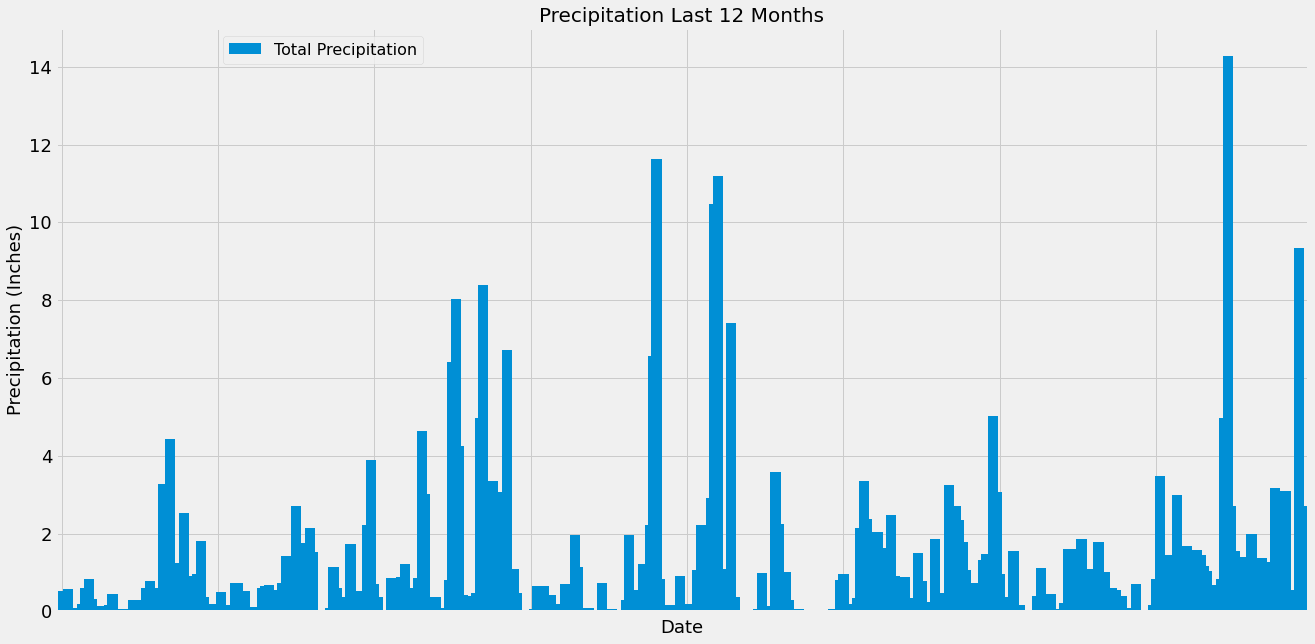

In [138]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(kind='bar', width=3, figsize=(20,10))
plt.locator_params(axis='x', nbins=8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=18)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation Over Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)

plt.show

In [125]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Total Precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [86]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurements.station.distinct()).count()

9

In [87]:
# Listing each distict station
session.query(Measurements.station.distinct()).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [89]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
s_results = session.query(Measurements.station, func.count(Measurements.station)).\
            group_by(Measurements.station).\
            order_by(func.count(Measurements.station).desc()).all()
s_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [92]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Highest temperature
max_temp = session.query(func.max(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()

max_temp

[(85.0)]

In [93]:
# Lowest temperature
min_temp = session.query(func.min(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()

min_temp

[(54.0)]

In [95]:
# Average temperature
avg_temp = session.query(func.avg(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()

avg_temp

[(71.66378066378067)]

In [105]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_results = session.query(Measurements.date, Measurements.tobs).\
    filter(Measurements.station == 'USC00519281').\
    filter(Measurements.date >= '2016-08-18').\
    order_by(Measurements.date.desc()).all()

temp_results

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [110]:
# List comprehension for data frame
rows = [{"Date": result[0], "Temperature": result[1]} for result in temp_results]
rows

[{'Date': '2017-08-18', 'Temperature': 79.0},
 {'Date': '2017-08-17', 'Temperature': 76.0},
 {'Date': '2017-08-16', 'Temperature': 76.0},
 {'Date': '2017-08-15', 'Temperature': 77.0},
 {'Date': '2017-08-14', 'Temperature': 77.0},
 {'Date': '2017-08-13', 'Temperature': 77.0},
 {'Date': '2017-08-06', 'Temperature': 83.0},
 {'Date': '2017-08-05', 'Temperature': 82.0},
 {'Date': '2017-08-04', 'Temperature': 77.0},
 {'Date': '2017-07-31', 'Temperature': 76.0},
 {'Date': '2017-07-30', 'Temperature': 81.0},
 {'Date': '2017-07-29', 'Temperature': 82.0},
 {'Date': '2017-07-28', 'Temperature': 81.0},
 {'Date': '2017-07-27', 'Temperature': 76.0},
 {'Date': '2017-07-26', 'Temperature': 75.0},
 {'Date': '2017-07-25', 'Temperature': 77.0},
 {'Date': '2017-07-24', 'Temperature': 75.0},
 {'Date': '2017-07-23', 'Temperature': 82.0},
 {'Date': '2017-07-22', 'Temperature': 77.0},
 {'Date': '2017-07-21', 'Temperature': 77.0},
 {'Date': '2017-07-20', 'Temperature': 77.0},
 {'Date': '2017-07-19', 'Temperatu

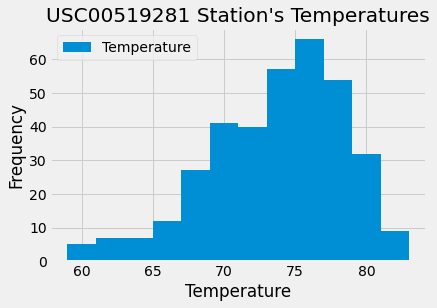

In [139]:
pd.DataFrame(rows).set_index("Date").hist(bins=12, legend=True)
plt.title("USC00519281 Station's Temperatures")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()